# **Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def prepare_data( n_top_features=8):
    # Chargement des données
    MetroPT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/MetroPT.csv')

    # Conversion de la colonne timestamp en datetime
    MetroPT['timestamp'] = pd.to_datetime(MetroPT['timestamp'])

    # Création de caractéristiques numériques à partir de la colonne timestamp
    MetroPT['year'] = MetroPT['timestamp'].dt.year
    MetroPT['month'] = MetroPT['timestamp'].dt.month
    MetroPT['day'] = MetroPT['timestamp'].dt.day
    MetroPT['hour'] = MetroPT['timestamp'].dt.hour
    MetroPT['minute'] = MetroPT['timestamp'].dt.minute
    MetroPT['second'] = MetroPT['timestamp'].dt.second

    # Regroupement des données par 'month', 'day', 'hour', et 'minute'
    grouped_data = MetroPT.groupby(['month', 'day', 'hour', 'minute']).agg({
        'TP2': 'mean',
        'TP3': 'mean',
        'H1': 'mean',
        'DV_pressure': 'mean',
        'Reservoirs': 'mean',
        'Oil_temperature': 'mean',
        'Motor_current': 'mean',
        'COMP': 'mean',
        'DV_eletric': 'mean',
        'Towers': 'mean',
        'MPG': 'mean',
        'LPS': 'mean',
        'Pressure_switch': 'mean',
        'Oil_level': 'mean',
        'Caudal_impulses': 'mean',
        'state': 'first',  # Prendre le premier état du groupe
        'failure_component': 'first',  # Prendre le premier composant de défaillance du groupe
        'RUL': 'mean'
    }).reset_index()

    # Afficher la taille du dataset final
    print(f"Taille du dataset après regroupement : {grouped_data.shape}")
    MetroPT= grouped_data
    # Suppression de la colonne timestamp originale et autres colonnes non pertinentes
    X = MetroPT.drop(columns=['RUL', 'state', 'failure_component'])
    y = MetroPT['RUL']  # Données de sortie (RUL)

    # Normalisation des données
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Création et entraînement du modèle pour la sélection des caractéristiques
    model = GradientBoostingRegressor(n_estimators=100)
    model.fit(X_scaled, y)

    # Importance des caractéristiques
    importances = model.feature_importances_

    # Affichage des scores d'importance pour chaque caractéristique
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df)

    # Sélection des n meilleures caractéristiques
    top_features = importance_df['Feature'].head(n_top_features).values
    print(f"Top {n_top_features} Features:", top_features)

    # Création d'un nouveau DataFrame avec les n meilleures caractéristiques
    X_top = X[top_features]

    # Normalisation des données réduites
    X_top_scaled = scaler.fit_transform(X_top)

    # Division des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = prepare_data(n_top_features=8)

Taille du dataset après regroupement : (155087, 22)
            Feature    Importance
0             month  5.382161e-01
7       DV_pressure  4.278812e-01
1               day  3.380129e-02
8        Reservoirs  5.569448e-05
2              hour  4.385325e-05
3            minute  1.468682e-06
10    Motor_current  2.922025e-07
6                H1  8.946106e-08
9   Oil_temperature  1.868636e-08
5               TP3  0.000000e+00
4               TP2  0.000000e+00
11             COMP  0.000000e+00
12       DV_eletric  0.000000e+00
13           Towers  0.000000e+00
14              MPG  0.000000e+00
15              LPS  0.000000e+00
16  Pressure_switch  0.000000e+00
17        Oil_level  0.000000e+00
18  Caudal_impulses  0.000000e+00
Top 8 Features: ['month' 'DV_pressure' 'day' 'Reservoirs' 'hour' 'minute' 'Motor_current'
 'H1']


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def prepare_data():
    # Chargement des données
    MetroPT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/MetroPT.csv')

    # Conversion de la colonne timestamp en datetime
    MetroPT['timestamp'] = pd.to_datetime(MetroPT['timestamp'])

    # Création de caractéristiques numériques à partir de la colonne timestamp
    MetroPT['year'] = MetroPT['timestamp'].dt.year
    MetroPT['month'] = MetroPT['timestamp'].dt.month
    MetroPT['day'] = MetroPT['timestamp'].dt.day
    MetroPT['hour'] = MetroPT['timestamp'].dt.hour
    MetroPT['minute'] = MetroPT['timestamp'].dt.minute
    MetroPT['second'] = MetroPT['timestamp'].dt.second

    # Regroupement des données par 'month', 'day', 'hour', et 'minute'
    grouped_data = MetroPT.groupby(['month', 'day', 'hour', 'minute']).agg({
        'TP2': 'mean',
        'TP3': 'mean',
        'H1': 'mean',
        'DV_pressure': 'mean',
        'Reservoirs': 'mean',
        'Oil_temperature': 'mean',
        'Motor_current': 'mean',
        'COMP': 'mean',
        'DV_eletric': 'mean',
        'Towers': 'mean',
        'MPG': 'mean',
        'LPS': 'mean',
        'Pressure_switch': 'mean',
        'Oil_level': 'mean',
        'Caudal_impulses': 'mean',
        'state': 'first',  # Prendre le premier état du groupe
        'failure_component': 'first',  # Prendre le premier composant de défaillance du groupe
        'RUL': 'mean'
    }).reset_index()

    # Afficher la taille du dataset final
    print(f"Taille du dataset après regroupement : {grouped_data.shape}")
    MetroPT = grouped_data

    # Suppression de la colonne timestamp originale et autres colonnes non pertinentes
    X = MetroPT.drop(columns=['RUL', 'state', 'failure_component'])
    y = MetroPT['RUL']  # Données de sortie (RUL)

    # Liste des caractéristiques à conserver
    top_features = ['month', 'DV_pressure', 'day', 'Reservoirs', 'hour', 'minute', 'Motor_current']

    # Création d'un nouveau DataFrame avec les caractéristiques spécifiées
    X_top = X[top_features]

    # Normalisation des données réduites
    scaler = MinMaxScaler()
    X_top_scaled = scaler.fit_transform(X_top)

    # Division des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = prepare_data()


Taille du dataset après regroupement : (155087, 22)


# Fonction pour évaluer le modèle

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R^2 : {r2}")
    print(f"RMSE: {rmse}" )
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2: {r2:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # Visualisation des prédictions vs valeurs réelles
    fig, ax = plt.subplots(figsize=(12, 6))

    # Tracé des points
    ax.scatter(y_test, y_pred, alpha=0.5, color='red', linestyle='-', label='Predictions')

    # Tracé de la ligne de référence
    min_val = min(min(y_test), min(y_pred))
    max_val = max(max(y_test), max(y_pred))
    ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Reference line')

    # Mise en forme du graphique
    ax.set_title('Predictions vs True Values')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predictions')
    ax.legend()

    # Ajustement des axes
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal')

    plt.show()


    return mse, mae, r2

# ML Models

## Régression Linéaire

Linear Regression Performance:
MSE: 0.39325543508774763
MAE: 0.4959372066484303
R^2 : 0.9997994245973834
RMSE: 0.6271008173234569
MAE: 0.50
MSE: 0.39
R2: 1.00
RMSE: 0.63


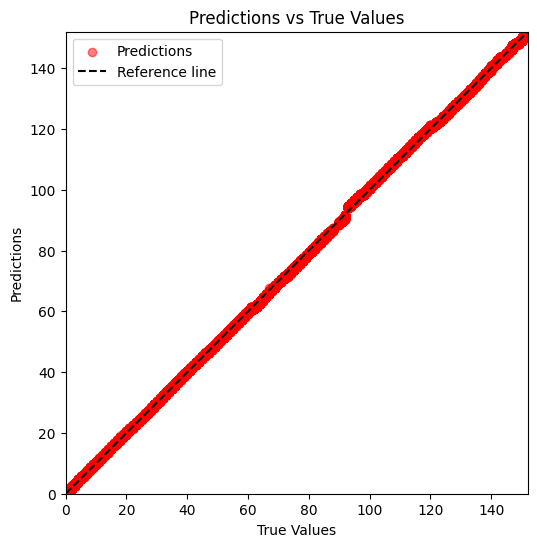

(0.39325543508774763, 0.4959372066484303, 0.9997994245973834)

In [ ]:
from sklearn.linear_model import LinearRegression
# Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression Performance:")
evaluate_model(lin_reg, X_test, y_test)


## Forêt Aléatoire (RF)

Random Forest Performance:
MSE: 0.09157159457247323
MAE: 0.007020151730293709
R^2 : 0.9999532949634999
RMSE: 0.3026079882826513
MAE: 0.01
MSE: 0.09
R2: 1.00
RMSE: 0.30


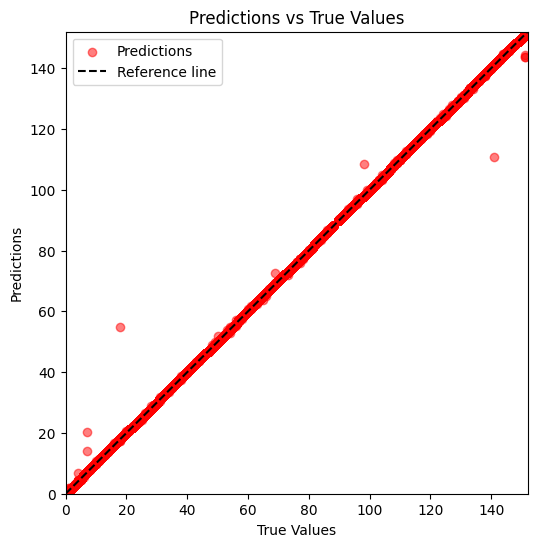

(0.09157159457247323, 0.007020151730293709, 0.9999532949634999)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
print("Random Forest Performance:")
evaluate_model(rf_reg, X_test, y_test)


## Support Vector Regressor (SVR)

Support Vector Regressor Performance:
MSE: 0.4373205722833075
MAE: 0.33811930016468633
R^2 : 0.9997769496819829
RMSE: 0.6613021792518965
MAE: 0.34
MSE: 0.44
R2: 1.00
RMSE: 0.66


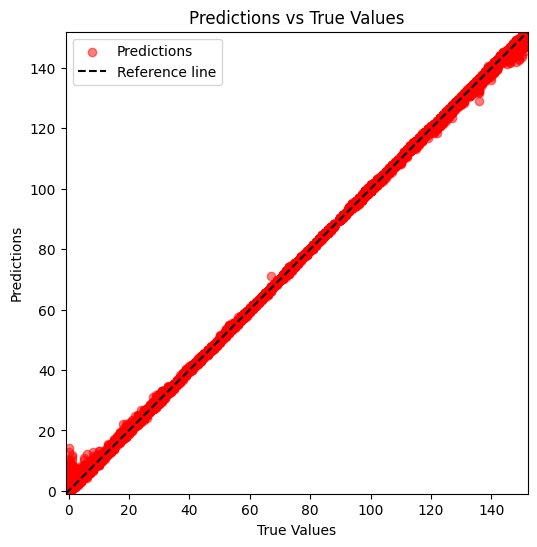

(0.4373205722833075, 0.33811930016468633, 0.9997769496819829)

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
print("Support Vector Regressor Performance:")
evaluate_model(svr_reg, X_test, y_test)


## K-Nearest Neighbors (KNN)

K-Nearest Neighbors Performance:
MSE: 0.6743784487782075
MAE: 0.43314229498564166
R^2 : 0.9996560410440367
RMSE: 0.8212054851121049
MAE: 0.43
MSE: 0.67
R2: 1.00
RMSE: 0.82


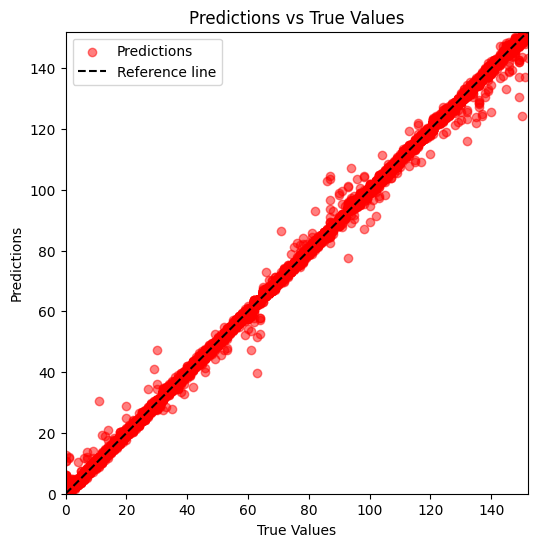

(0.6743784487782075, 0.43314229498564166, 0.9996560410440367)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
print("K-Nearest Neighbors Performance:")
evaluate_model(knn_reg, X_test, y_test)


# **DL Models**

## LSTM

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Charger le dataset
MetroPT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/MetroPT.csv')

# Conversion de la colonne timestamp en datetime
MetroPT['timestamp'] = pd.to_datetime(MetroPT['timestamp'])

# Création de caractéristiques numériques à partir de la colonne timestamp
MetroPT['year'] = MetroPT['timestamp'].dt.year
MetroPT['month'] = MetroPT['timestamp'].dt.month
MetroPT['day'] = MetroPT['timestamp'].dt.day
MetroPT['hour'] = MetroPT['timestamp'].dt.hour
MetroPT['minute'] = MetroPT['timestamp'].dt.minute
MetroPT['second'] = MetroPT['timestamp'].dt.second

# Regroupement des données par 'month', 'day', 'hour', et 'minute'
grouped_data = MetroPT.groupby(['month', 'day', 'hour', 'minute']).agg({
    'TP2': 'mean',
    'TP3': 'mean',
    'H1': 'mean',
    'DV_pressure': 'mean',
    'Reservoirs': 'mean',
    'Oil_temperature': 'mean',
    'Motor_current': 'mean',
    'COMP': 'mean',
    'DV_eletric': 'mean',
    'Towers': 'mean',
    'MPG': 'mean',
    'LPS': 'mean',
    'Pressure_switch': 'mean',
    'Oil_level': 'mean',
    'Caudal_impulses': 'mean',
    'state': 'first',
    'failure_component': 'first',
    'RUL': 'mean'
}).reset_index()

# Afficher la taille du dataset final
print(f"Taille du dataset après regroupement : {grouped_data.shape}")
MetroPT = grouped_data

# Suppression de la colonne timestamp originale et autres colonnes non pertinentes
X = MetroPT.drop(columns=['RUL', 'state', 'failure_component'])
y = MetroPT['RUL']  # Données de sortie (RUL)

# Normalisation des données
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalisation de la cible (RUL)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Création et entraînement du modèle pour la sélection des caractéristiques
n_top_features = 8
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_scaled, y_scaled.ravel())

# Importance des caractéristiques
importances = model.feature_importances_

# Affichage des scores d'importance pour chaque caractéristique
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Sélection des n meilleures caractéristiques
top_features = importance_df['Feature'].head(n_top_features).values
print(f"Top {n_top_features} Features:", top_features)

# Création d'un nouveau DataFrame avec les n meilleures caractéristiques
X_top = X[top_features]

# Normalisation des données réduites
X_top_scaled = scaler_X.fit_transform(X_top)

# Define the cutoff index for the train-test split
cutoff_index = int(len(X_top) * 0.7)  # 70% train, 30% test

# Perform the sequential train-test split
X_train, X_test = X_top_scaled[:cutoff_index], X_top_scaled[cutoff_index:]
y_train, y_test = y_scaled[:cutoff_index], y_scaled[cutoff_index:]

# Mise en forme des données pour l'LSTM
n_steps = 10
X_train_seq = np.array([X_train[i:i+n_steps] for i in range(len(X_train)-n_steps)])
y_train_seq = y_train[n_steps:]

# Création du modèle LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(n_steps, X_train_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, verbose=0)

# Prédictions
y_pred_seq = model.predict(X_train_seq).ravel()
y_pred = scaler_y.inverse_transform(y_pred_seq.reshape(-1, 1)).ravel()

# Evaluation
y_true = scaler_y.inverse_transform(y_train_seq.reshape(-1, 1)).ravel()

# Perform evaluation using the original scale of the target variable
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

fig, ax = plt.subplots(figsize=(12, 6))

# Tracé des points
ax.scatter(y_true, y_pred, alpha=0.5, color='red', linestyle='-', label='Predictions')

# Tracé de la ligne de référence
min_val = min(min(y_true), min(y_pred))
max_val = max(max(y_true), max(y_pred))
ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Reference line')

# Mise en forme du graphique
ax.set_title('Predictions vs True Values')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
ax.legend()

# Ajustement des axes
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_aspect('equal')

plt.show()

Taille du dataset après regroupement : (155087, 22)
            Feature    Importance
0             month  5.382161e-01
7       DV_pressure  4.278812e-01
1               day  3.380129e-02
8        Reservoirs  5.569448e-05
2              hour  4.385325e-05
3            minute  1.468682e-06
10    Motor_current  2.922025e-07
6                H1  8.946106e-08
9   Oil_temperature  1.868636e-08
5               TP3  0.000000e+00
4               TP2  0.000000e+00
11             COMP  0.000000e+00
12       DV_eletric  0.000000e+00
13           Towers  0.000000e+00
14              MPG  0.000000e+00
15              LPS  0.000000e+00
16  Pressure_switch  0.000000e+00
17        Oil_level  0.000000e+00
18  Caudal_impulses  0.000000e+00
Top 8 Features: ['month' 'DV_pressure' 'day' 'Reservoirs' 'hour' 'minute' 'Motor_current'
 'H1']
3393/3393 [==============================] - 11s 3ms/step
MAE: 0.15
MSE: 0.03
R2: 1.00
RMSE: 0.17


## BiLSTM

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Charger le dataset
MetroPT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/MetroPT.csv')

# Conversion de la colonne timestamp en datetime
MetroPT['timestamp'] = pd.to_datetime(MetroPT['timestamp'])

# Création de caractéristiques numériques à partir de la colonne timestamp
MetroPT['year'] = MetroPT['timestamp'].dt.year
MetroPT['month'] = MetroPT['timestamp'].dt.month
MetroPT['day'] = MetroPT['timestamp'].dt.day
MetroPT['hour'] = MetroPT['timestamp'].dt.hour
MetroPT['minute'] = MetroPT['timestamp'].dt.minute
MetroPT['second'] = MetroPT['timestamp'].dt.second

# Regroupement des données par 'month', 'day', 'hour', et 'minute'
grouped_data = MetroPT.groupby(['month', 'day', 'hour', 'minute']).agg({
    'TP2': 'mean',
    'TP3': 'mean',
    'H1': 'mean',
    'DV_pressure': 'mean',
    'Reservoirs': 'mean',
    'Oil_temperature': 'mean',
    'Motor_current': 'mean',
    'COMP': 'mean',
    'DV_eletric': 'mean',
    'Towers': 'mean',
    'MPG': 'mean',
    'LPS': 'mean',
    'Pressure_switch': 'mean',
    'Oil_level': 'mean',
    'Caudal_impulses': 'mean',
    'state': 'first',
    'failure_component': 'first',
    'RUL': 'mean'
}).reset_index()

# Afficher la taille du dataset final
print(f"Taille du dataset après regroupement : {grouped_data.shape}")
MetroPT = grouped_data

# Suppression de la colonne timestamp originale et autres colonnes non pertinentes
X = MetroPT.drop(columns=['RUL', 'state', 'failure_component'])
y = MetroPT['RUL']  # Données de sortie (RUL)

# Normalisation des données
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalisation de la cible (RUL)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Création et entraînement du modèle pour la sélection des caractéristiques
n_top_features = 8
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_scaled, y_scaled.ravel())

# Importance des caractéristiques
importances = model.feature_importances_

# Affichage des scores d'importance pour chaque caractéristique
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Sélection des n meilleures caractéristiques
top_features = importance_df['Feature'].head(n_top_features).values
print(f"Top {n_top_features} Features:", top_features)

# Création d'un nouveau DataFrame avec les n meilleures caractéristiques
X_top = X[top_features]

# Normalisation des données réduites
X_top_scaled = scaler_X.fit_transform(X_top)

# Définir l'indice de coupure pour la division train-test
cutoff_index = int(len(X_top) * 0.7)  # 70% train, 30% test

# Effectuer la division séquentielle train-test
X_train, X_test = X_top_scaled[:cutoff_index], X_top_scaled[cutoff_index:]
y_train, y_test = y_scaled[:cutoff_index], y_scaled[cutoff_index:]

# Mise en forme des données pour BiLSTM
n_steps = 10
X_train_seq = np.array([X_train[i:i+n_steps] for i in range(len(X_train)-n_steps)])
y_train_seq = y_train[n_steps:]

# Création du modèle BiLSTM
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(n_steps, X_train_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, verbose=0)

# Prédictions
y_pred_seq = model.predict(X_train_seq).ravel()
y_pred = scaler_y.inverse_transform(y_pred_seq.reshape(-1, 1)).ravel()

# Evaluation
y_true = scaler_y.inverse_transform(y_train_seq.reshape(-1, 1)).ravel()

# Évaluation avec l'échelle originale de la variable cible
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

fig, ax = plt.subplots(figsize=(12, 6))

# Tracé des points
ax.scatter(y_true, y_pred, alpha=0.5, color='red', linestyle='-', label='Predictions')

# Tracé de la ligne de référence
min_val = min(min(y_true), min(y_pred))
max_val = max(max(y_true), max(y_pred))
ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Reference line')

# Mise en forme du graphique
ax.set_title('Predictions vs True Values')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
ax.legend()

# Ajustement des axes
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_aspect('equal')

plt.show()


Taille du dataset après regroupement : (155087, 22)
            Feature    Importance
0             month  5.382161e-01
7       DV_pressure  4.278812e-01
1               day  3.380129e-02
8        Reservoirs  5.567537e-05
2              hour  4.385325e-05
3            minute  1.468682e-06
10    Motor_current  2.922025e-07
6                H1  8.946106e-08
9   Oil_temperature  1.868636e-08
5               TP3  0.000000e+00
4               TP2  0.000000e+00
11             COMP  0.000000e+00
12       DV_eletric  0.000000e+00
13           Towers  0.000000e+00
14              MPG  0.000000e+00
15              LPS  0.000000e+00
16  Pressure_switch  0.000000e+00
17        Oil_level  0.000000e+00
18  Caudal_impulses  0.000000e+00
Top 8 Features: ['month' 'DV_pressure' 'day' 'Reservoirs' 'hour' 'minute' 'Motor_current'
 'H1']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3185/3393 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

3393/3393 [==============================] - 10s 3ms/step
MAE: 0.06
MSE: 0.01
R2: 1.00
RMSE: 0.09


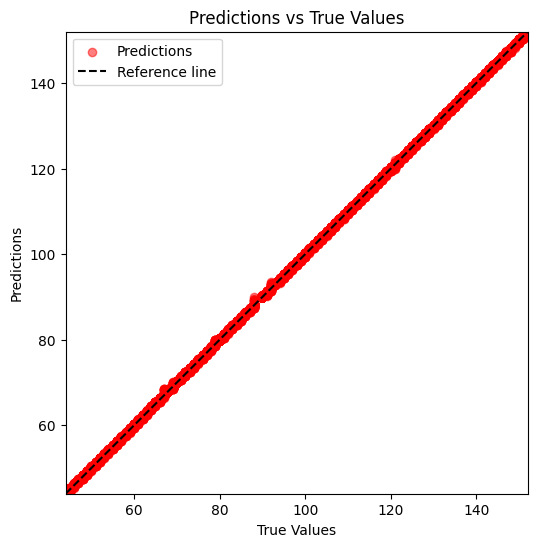

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Charger le dataset
MetroPT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/preprocessed_dataset.csv')


# Suppression de la colonne timestamp originale et autres colonnes non pertinentes
X = MetroPT.drop(columns=['RUL', 'state', 'failure_component'])
y = MetroPT['RUL']  # Données de sortie (RUL)

# # Normalisation des données
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# # Normalisation de la cible (RUL)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Sélection des colonnes spécifiques
X_top = MetroPT[['month', 'DV_pressure', 'day', 'Reservoirs', 'hour', 'minute', 'Motor_current', 'H1']]


# Normalisation des données réduites
X_top_scaled = scaler_X.fit_transform(X_top)

# Définir l'indice de coupure pour la division train-test
cutoff_index = int(len(X_top) * 0.7)  # 70% train, 30% test

# Effectuer la division séquentielle train-test
X_train, X_test = X_top_scaled[:cutoff_index], X_top_scaled[cutoff_index:]
y_train, y_test = y_scaled[:cutoff_index], y_scaled[cutoff_index:]

# Mise en forme des données pour BiLSTM
n_steps = 10
X_train_seq = np.array([X_train[i:i+n_steps] for i in range(len(X_train)-n_steps)])
y_train_seq = y_train[n_steps:]

# Création du modèle BiLSTM
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(n_steps, X_train_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, verbose=0)

# Prédictions
y_pred_seq = model.predict(X_train_seq).ravel()
y_pred = scaler_y.inverse_transform(y_pred_seq.reshape(-1, 1)).ravel()

# Evaluation
y_true = scaler_y.inverse_transform(y_train_seq.reshape(-1, 1)).ravel()

# Évaluation avec l'échelle originale de la variable cible
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

fig, ax = plt.subplots(figsize=(12, 6))

# Tracé des points
ax.scatter(y_true, y_pred, alpha=0.5, color='red', linestyle='-', label='Predictions')

# Tracé de la ligne de référence
min_val = min(min(y_true), min(y_pred))
max_val = max(max(y_true), max(y_pred))
ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Reference line')

# Mise en forme du graphique
ax.set_title('Predictions vs True Values')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
ax.legend()

# Ajustement des axes
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_aspect('equal')

plt.show()


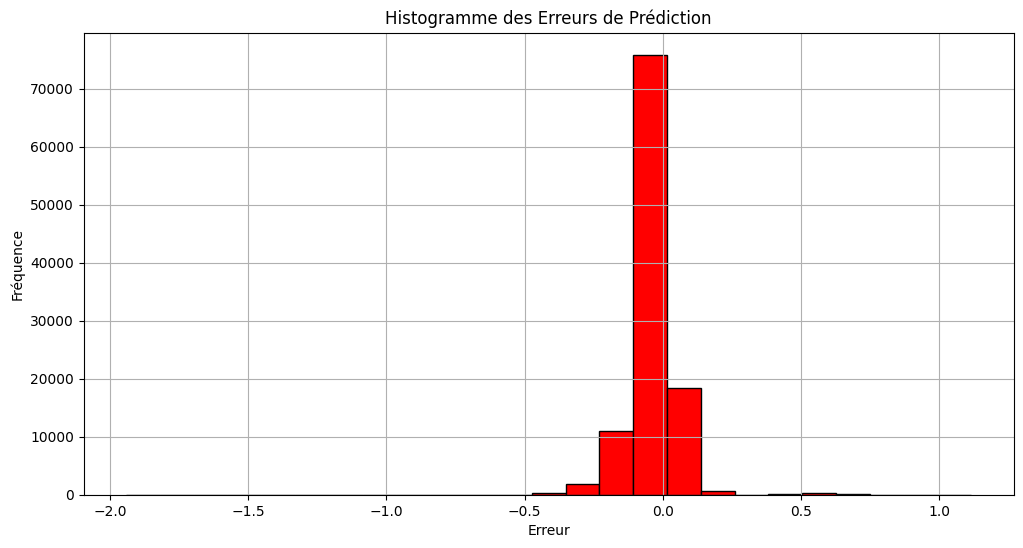

In [ ]:
# Calcul des erreurs de prédiction
errors = y_true - y_pred

# Histogramme des erreurs
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=25, color='red', edgecolor='black')
plt.title('Histogramme des Erreurs de Prédiction')
plt.xlabel('Erreur')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


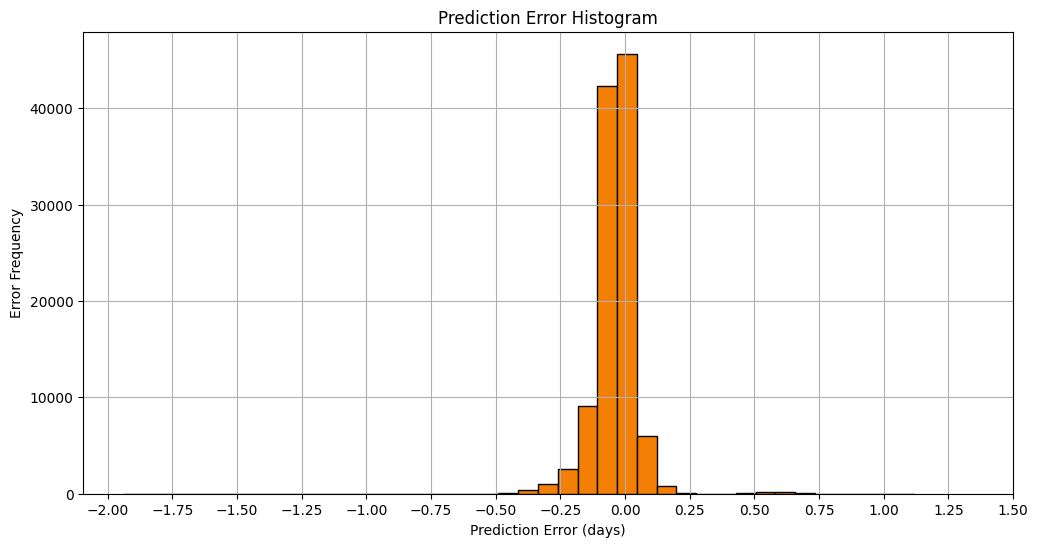

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des erreurs de prédiction
errors = y_true - y_pred

# Définir les limites et l'intervalle pour les bins et les ticks
min_error = -2
max_error = 1.5
interval = 0.25

# Histogramme des erreurs
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=40, color='#f47f05', edgecolor='black')
plt.title('Prediction Error Histogram')
plt.xlabel('Prediction Error (days)')
plt.ylabel('Error Frequency')


# Définir les ticks de l'axe des x pour plus de précision
plt.xticks(np.arange(min_error, max_error + interval, interval))

plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Charger le dataset
MetroPT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/MetroPT.csv')

# Conversion de la colonne timestamp en datetime
MetroPT['timestamp'] = pd.to_datetime(MetroPT['timestamp'])

# Création de caractéristiques numériques à partir de la colonne timestamp
MetroPT['year'] = MetroPT['timestamp'].dt.year
MetroPT['month'] = MetroPT['timestamp'].dt.month
MetroPT['day'] = MetroPT['timestamp'].dt.day
MetroPT['hour'] = MetroPT['timestamp'].dt.hour
MetroPT['minute'] = MetroPT['timestamp'].dt.minute
MetroPT['second'] = MetroPT['timestamp'].dt.second

# Regroupement des données par 'month', 'day', 'hour', et 'minute'
grouped_data = MetroPT.groupby(['month', 'day', 'hour', 'minute']).agg({
    'TP2': 'mean',
    'TP3': 'mean',
    'H1': 'mean',
    'DV_pressure': 'mean',
    'Reservoirs': 'mean',
    'Oil_temperature': 'mean',
    'Motor_current': 'mean',
    'COMP': 'mean',
    'DV_eletric': 'mean',
    'Towers': 'mean',
    'MPG': 'mean',
    'LPS': 'mean',
    'Pressure_switch': 'mean',
    'Oil_level': 'mean',
    'Caudal_impulses': 'mean',
    'state': 'first',
    'failure_component': 'first',
    'RUL': 'mean'
}).reset_index()

# Trier les données regroupées par year, month, day, hour, minute
grouped_data = grouped_data.sort_values(by=['month', 'day', 'hour', 'minute'])

# Enregistrer le dataset prétraité
grouped_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/preprocessed_dataset.csv', index=False)


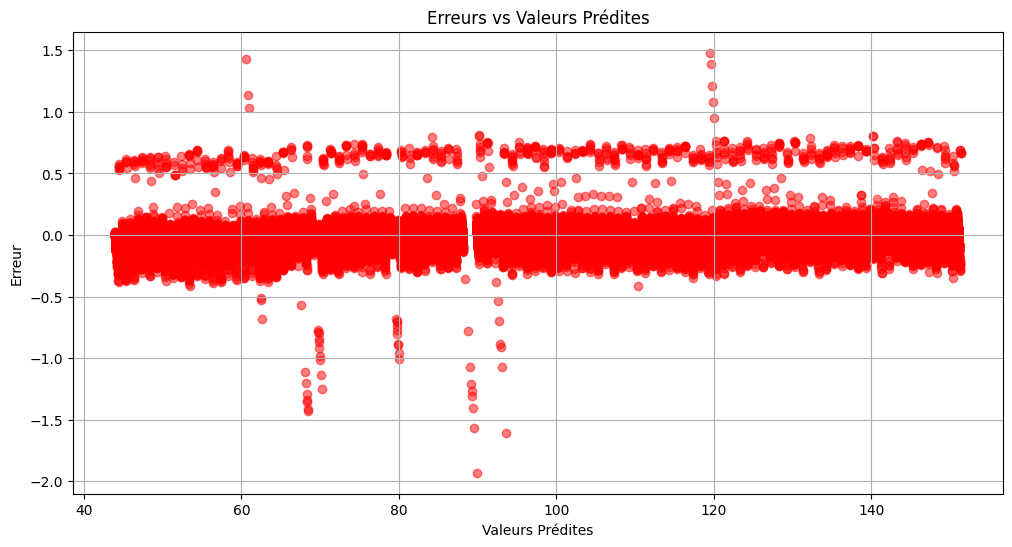

In [ ]:
# Graphique des erreurs en fonction des valeurs prédites
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, errors, alpha=0.5, color='red')
plt.title('Erreurs vs Valeurs Prédites')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Erreur')
plt.grid(True)
plt.show()


# comparaison

## He et al. \cite{HE2024}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Évaluation du modèle
print("Fully Connected Layer Performance:")
evaluate_model(model, X_test, y_test)

Epoch 1/50
3878/3878 [==============================] - 13s 3ms/step - loss: 388.8342
Epoch 2/50
3878/3878 [==============================] - 10s 3ms/step - loss: 0.4527
Epoch 3/50
3878/3878 [==============================] - 11s 3ms/step - loss: 0.4622
Epoch 4/50
3878/3878 [==============================] - 11s 3ms/step - loss: 0.4606
Epoch 5/50
3878/3878 [==============================] - 10s 3ms/step - loss: 0.4598
Epoch 6/50
3878/3878 [==============================] - 11s 3ms/step - loss: 0.4627
Epoch 7/50
3878/3878 [==============================] - 11s 3ms/step - loss: 0.4581
Epoch 8/50
3878/3878 [==============================] - 12s 3ms/step - loss: 0.4653
Epoch 9/50
3878/3878 [==============================] - 14s 4ms/step - loss: 0.4565
Epoch 10/50
3878/3878 [==============================] - 10s 3ms/step - loss: 0.4601
Epoch 11/50
3878/3878 [==============================] - 11s 3ms/step - loss: 0.4612
Epoch 12/50
3878/3878 [==============================] - 9s 2ms/step - l

## Li 2023 (Ensemble Learner:KNN, SVR, XGB, DNN)

Ensemble Learner Performance:
MSE: 0.07800462031288415
MAE: 0.15744640906098645
R^2 : 0.9999602146423692
RMSE: 0.2792930724398372
MAE: 0.16
MSE: 0.08
R2: 1.00
RMSE: 0.28


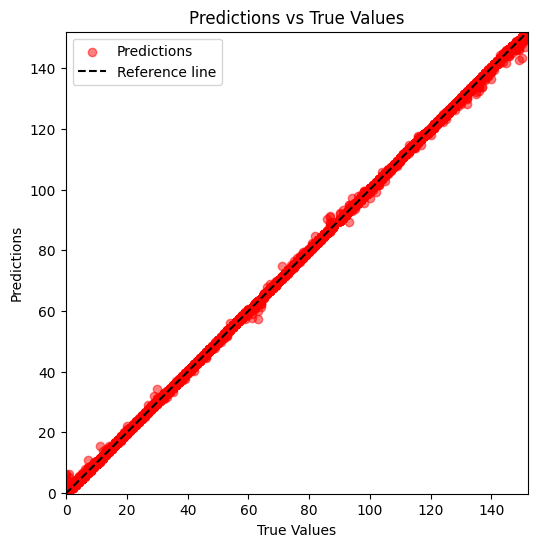

(0.07800462031288415, 0.15744640906098645, 0.9999602146423692)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Exemple de données en 3D transformées en 2D
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Créer les modèles individuels
knn = KNeighborsRegressor(n_neighbors=5)
svm = SVR()
xgb = XGBRegressor()
dnn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

# Créer l'ensemble learner avec VotingRegressor
ensemble_reg = VotingRegressor(estimators=[
    ('knn', knn),
    ('svm', svm),
    ('xgb', xgb),
    ('dnn', dnn)
])

# Ajuster l'ensemble learner aux données d'entraînement
ensemble_reg.fit(X_train_2d, y_train)

# Évaluer le modèle combiné
print("Ensemble Learner Performance:")
evaluate_model(ensemble_reg, X_test_2d, y_test)


## WANG 2023 ( SVR with Kalman filter )

SVR Performance:
MSE: 0.31186980424847127
MAE: 0.28124429395552925
R^2 : 0.9998409344004688
RMSE: 0.5584530456971931
MAE: 0.28
MSE: 0.31
R2: 1.00
RMSE: 0.56


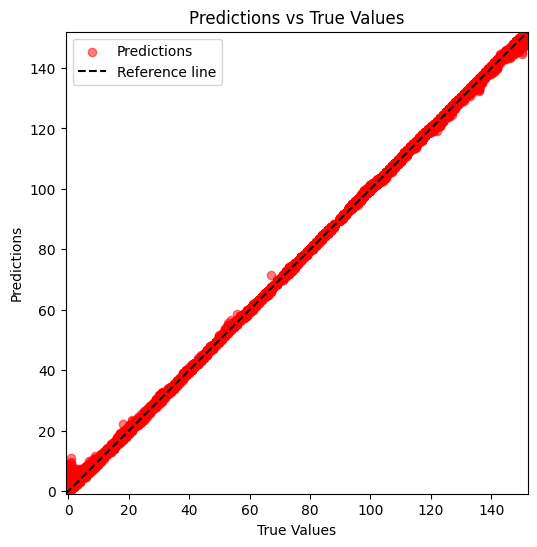

Filtered SVR Performance with Kalman Filter:


TypeError: Singleton array array(None, dtype=object) cannot be considered a valid collection.

In [ ]:
import numpy as np
from sklearn.svm import SVR
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Création et entraînement du modèle SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)
print("SVR Performance:")
evaluate_model(svr, X_test, y_test)

# Initialisation du filtre de Kalman
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., 0.])  # État initial
kf.P = np.eye(2) * 1000  # Matrice de covariance initiale
kf.F = np.array([[1., 1.], [0., 1.]])  # Matrice de transition d'état
kf.H = np.array([[1., 0.]])  # Matrice d'observation
kf.R = np.eye(1) * 5  # Matrice de covariance du bruit de mesure
kf.Q = np.eye(2)  # Matrice de covariance du bruit de processus

# Filtrage de Kalman
def kalman_filter(predictions):
    filtered_predictions = []
    for pred in predictions:
        kf.predict()
        kf.update(pred)
        filtered_predictions.append(kf.x[0])
    return np.array(filtered_predictions)

# Appliquer le filtrage de Kalman aux prédictions du modèle SVR
svr_predictions = svr.predict(X_test)
kalman_predictions = kalman_filter(svr_predictions)

# Évaluation des prédictions filtrées
print("Filtered SVR Performance with Kalman Filter:")
# Calculer les métriques
mae = mean_absolute_error(y_test, kalman_predictions)
mse = mean_squared_error(y_test, kalman_predictions)
rmse = np.sqrt(mse)

# Afficher les métriques
print("Filtered SVR Performance with Kalman Filter:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Filtered SVR Performance with Kalman Filter:
MAE: 17.6955524737636
MSE: 470.7260189120873
RMSE: 21.696221304920524
